### Description: Build a decision tree classifier to predict a categorical outcome (e.g., predict species of flowers).

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [25]:
Iris = pd.read_csv('Iris.csv')
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Features (X) and target (y)
X = Iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Select feature columns
y = Iris['Species']  # Target column

In [7]:
# Encode the target variable (Species) to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts 'setosa', 'versicolor', 'virginica' to 0, 1, 2

y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [9]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)

/home/musty/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [10]:
# Make predictions
y_pred = log_reg.predict(X_test)

In [14]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [15]:
# 2. Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



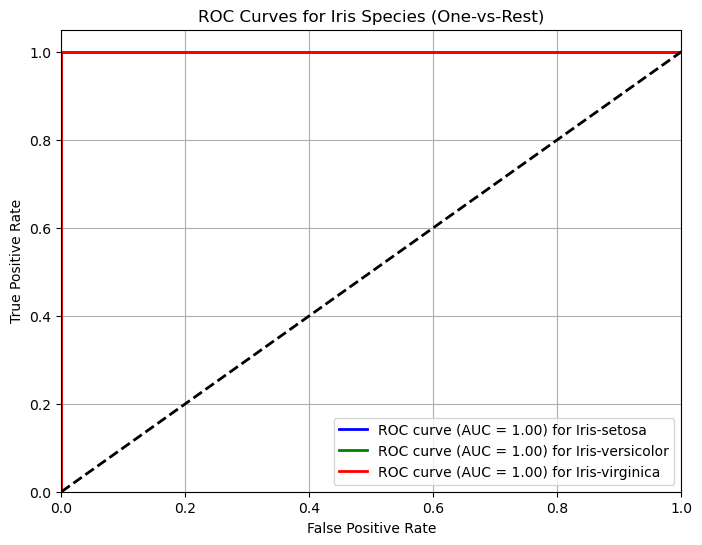

In [20]:
# 3. ROC Curve and AUC (One-vs-Rest for multi-class)
# Binarize the output for ROC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = log_reg.predict_proba(X_test)  # Probability scores for each class

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_encoder.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for {label_encoder.classes_[i]}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Iris Species (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

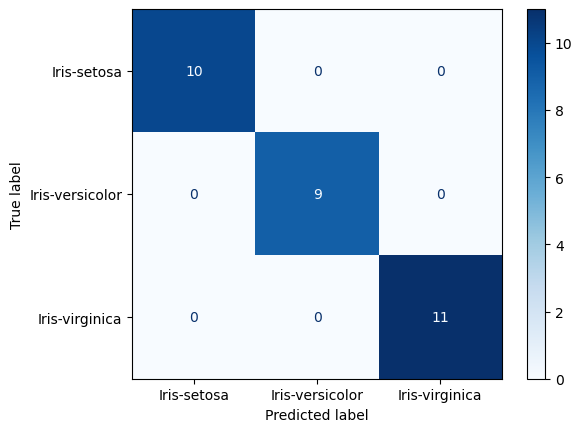

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

#### Compare logistic regression with other classifiers like Random Forest or SVM.

In [26]:
# Initialize models
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)  # probability=True for ROC


/home/musty/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression:
Accuracy: 1.00
Classification Report:
Iris-setosa: Precision=1.00, Recall=1.00, F1-score=1.00
Iris-versicolor: Precision=1.00, Recall=1.00, F1-score=1.00
Iris-virginica: Precision=1.00, Recall=1.00, F1-score=1.00
Average AUC: 1.00

Random Forest:
Accuracy: 1.00
Classification Report:
Iris-setosa: Precision=1.00, Recall=1.00, F1-score=1.00
Iris-versicolor: Precision=1.00, Recall=1.00, F1-score=1.00
Iris-virginica: Precision=1.00, Recall=1.00, F1-score=1.00
Average AUC: 1.00

SVM:
Accuracy: 1.00
Classification Report:
Iris-setosa: Precision=1.00, Recall=1.00, F1-score=1.00
Iris-versicolor: Precision=1.00, Recall=1.00, F1-score=1.00
Iris-virginica: Precision=1.00, Recall=1.00, F1-score=1.00
Average AUC: 1.00


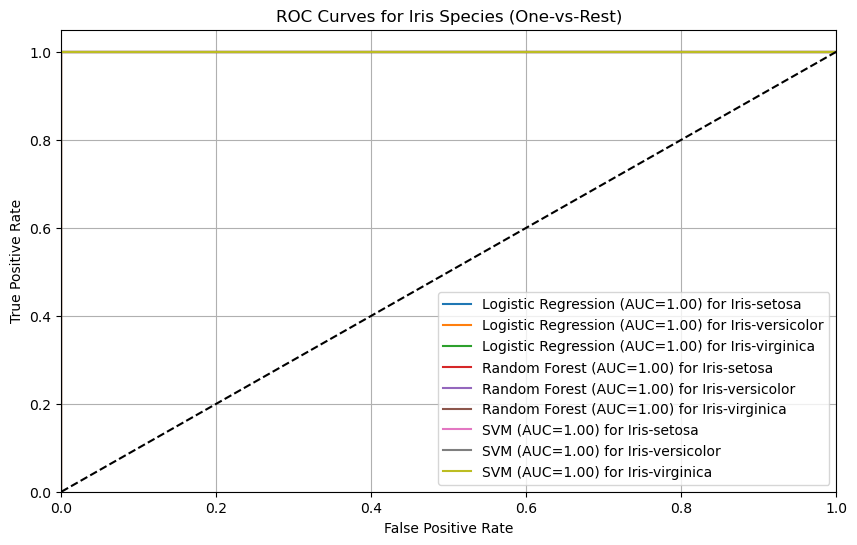

In [28]:
# Train and evaluate each model
models = {'Logistic Regression': log_reg, 'Random Forest': rf_clf, 'SVM': svm_clf}
results = {}


for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # 1. Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # 2. Classification Report
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    
    # 3. ROC Curve and AUC
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    y_score = model.predict_proba(X_test)  # Requires probability estimates
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    results[name] = {'accuracy': accuracy, 'report': report, 'roc_auc': roc_auc}

# Print results
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Classification Report:")
    for cls in label_encoder.classes_:
        print(f"{cls}: Precision={result['report'][cls]['precision']:.2f}, "
              f"Recall={result['report'][cls]['recall']:.2f}, "
              f"F1-score={result['report'][cls]['f1-score']:.2f}")
    print(f"Average AUC: {np.mean(list(result['roc_auc'].values())):.2f}")

# Plot ROC Curves
plt.figure(figsize=(10, 6))
for name, result in results.items():
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f'{name} (AUC={result["roc_auc"][i]:.2f}) for {label_encoder.classes_[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Iris Species (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Comparison of Logistic Regression, Random Forest, and SVM on Iris Dataset

- **"All the models performed exceptionally well in classifying the Iris dataset, achieving an accuracy of 1.00."**